In [1]:
# 2020 research project Twitter coronavirus

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import os
import json
from tqdm import tqdm
from collections import Counter
import seaborn as sns

In [6]:
temp = "/Users/tomashegewisch/Downloads/030110/BUF_20200308.json"
df = pd.read_json(temp, lines=True, orient='records')
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1236802917270720512,1236802429024456704,2020-03-08 23:56:08,2020-03-08,23:56:08,UTC,3373580632,shoun_b,YouTube: Asisipho Burwana,,...,"-32.874805,27.619355,43.254838km",,,,,"[{'user_id': '3373580632', 'username': 'Shoun_...",,,,
1,1236802765596381184,1236802765596381184,2020-03-08 23:55:32,2020-03-08,23:55:32,UTC,3373580632,shoun_b,YouTube: Asisipho Burwana,,...,"-32.874805,27.619355,43.254838km",,,,,"[{'user_id': '3373580632', 'username': 'Shoun_...",,,,
2,1236802639880478726,1236796417466945536,2020-03-08 23:55:02,2020-03-08,23:55:02,UTC,3373580632,shoun_b,YouTube: Asisipho Burwana,,...,"-32.874805,27.619355,43.254838km",,,,,"[{'user_id': '3373580632', 'username': 'Shoun_...",,,,
3,1236801779834195973,1236801779834195968,2020-03-08 23:51:37,2020-03-08,23:51:37,UTC,3373580632,shoun_b,YouTube: Asisipho Burwana,,...,"-32.874805,27.619355,43.254838km",,,,,"[{'user_id': '3373580632', 'username': 'Shoun_...",,,,
4,1236800925999734786,1236294173478748160,2020-03-08 23:48:14,2020-03-08,23:48:14,UTC,931518801442758656,thandisizwe_sam,Thandisizwe Ka Sam,,...,"-32.874805,27.619355,43.254838km",,,,,"[{'user_id': '931518801442758656', 'username':...",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1236456826784436224,1236393597836165120,2020-03-08 01:00:54,2020-03-08,01:00:54,UTC,332314152,anita_ckn,Anita Wine Lover Cakana,,...,"-32.874805,27.619355,43.254838km",,,,,"[{'user_id': '332314152', 'username': 'anita_c...",,,,
919,1236454489445580800,1236454489445580800,2020-03-08 00:51:37,2020-03-08,00:51:37,UTC,208941470,samela_samz,fire we make 🔥🔥🔥,,...,"-32.874805,27.619355,43.254838km",,,,,"[{'user_id': '208941470', 'username': 'samela_...",,,,
920,1236453844462206982,1236452081550098432,2020-03-08 00:49:03,2020-03-08,00:49:03,UTC,208941470,samela_samz,fire we make 🔥🔥🔥,,...,"-32.874805,27.619355,43.254838km",,,,,"[{'user_id': '208941470', 'username': 'samela_...",,,,
921,1236451809767669761,1236451809767669760,2020-03-08 00:40:58,2020-03-08,00:40:58,UTC,208941470,samela_samz,fire we make 🔥🔥🔥,,...,"-32.874805,27.619355,43.254838km",,,,,"[{'user_id': '208941470', 'username': 'samela_...",,,,


In [4]:
dic = "/Users/tomashegewisch/Downloads/030110/"
dic = "/Users/tomashegewisch/Downloads/test/"
files = os.listdir(dic)
df = pd.DataFrame()
for i in tqdm(files):
    #print(dic+str(i))
    try:
        temp_df = pd.read_json(dic+str(i), lines=True, orient='records')
    except:
        print("somthing went wrong with this one..." + str(i))
    df = df.append(temp_df)
print("done")

 23%|██▎       | 6/26 [00:00<00:01, 10.48it/s]

somthing went wrong with this one....DS_Store


100%|██████████| 26/26 [00:01<00:00, 17.33it/s]

done


<AxesSubplot:>

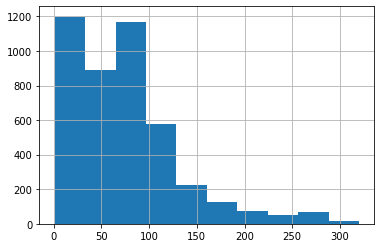

In [5]:
#How long are each tweet...
df['tweet'].str.len().hist()

<AxesSubplot:>

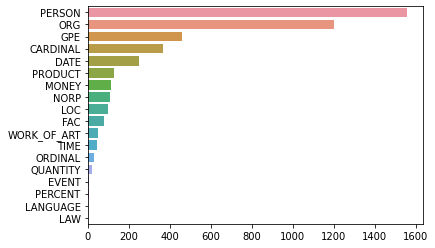

In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')
def ner(text):
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

ent = df['tweet'].apply(lambda x : ner(x))
ent = [x for sub in ent for x in sub]
counter = Counter(ent)
counter
count = counter.most_common()
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tom

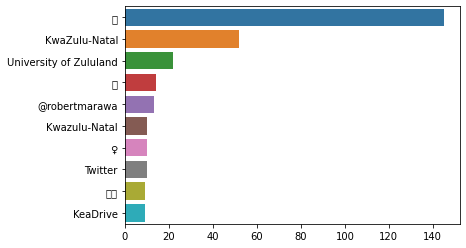

In [8]:
def display(ents):
    def ner(text,ent=ents):
        doc = nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    gpe = df['tweet'].apply(lambda x: ner(x))
    gpe = [i for x in gpe for i in x]
    counter = Counter(gpe)
    x,y = map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x)

display("ORG")

In [20]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import gensim

nltk.download('stopwords')
stop = set(stopwords.words('english'))


nltk.download('punkt')
nltk.download('wordnet')



stem = PorterStemmer()
lem = WordNetLemmatizer()
def preprocess_tweets(df):
    corpus=[]
    
    for news in df['tweet']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus = preprocess_tweets(df)
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.024*"http" + 0.005*"like" + 0.005*"people" + 0.004*"get" + 0.004*"kwazulu-natal" + 0.004*"esikhawini" + 0.004*"way" + 0.003*"one" + 0.003*"always" + 0.003*"want"'),
 (1,
  '0.026*"http" + 0.006*"lol" + 0.006*"ngathi" + 0.005*"still" + 0.005*"love" + 0.005*"like" + 0.004*"zululand" + 0.004*"university" + 0.003*"back" + 0.003*"n\'t"'),
 (2,
  '0.057*"http" + 0.009*"bay" + 0.009*"richards" + 0.005*"😂😂😂" + 0.005*"well" + 0.005*"kwazulu-natal" + 0.004*"need" + 0.004*"know" + 0.003*"nje" + 0.003*"day"'),
 (3,
  '0.061*"http" + 0.005*"time" + 0.004*"n\'t" + 0.004*"one" + 0.004*"happy" + 0.004*"bro" + 0.004*"since" + 0.003*"tell" + 0.003*"sure" + 0.003*"still"')]

In [11]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.182854 -0.046584       1        1  29.553225
0      0.080859 -0.134521       2        1  25.281540
2      0.002284  0.161136       3        1  23.900331
3      0.099711  0.019969       4        1  21.264903, topic_info=          Term         Freq        Total Category  logprob  loglift
31        http  1104.000000  1104.000000  Default  30.0000  30.0000
75         Bay    75.000000    75.000000  Default  29.0000  29.0000
78    Richards    74.000000    74.000000  Default  28.0000  28.0000
32        time    52.000000    52.000000  Default  27.0000  27.0000
1272       But    30.000000    30.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
75         Bay    18.225650    75.926078   Topic4  -5.7816   0.1212
799      Since    10.873373    23.298525   Topic4  -6.2981   0.7860
156       like    12.450530    61.194073   Topic4  -6.1626  -0.0442
128     Africa    10.390997    30.284970   Topic4  -6.3435   0.4784
44         The    10.384242    64.482649   Topic4  -6.3441  -0.2780

[258 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1614      2  0.972652     'll
1614      3  0.042289     'll
1004      1  0.335664     're
1004      2  0.311688     're
1004      3  0.167832     're
...     ...       ...     ...
876       2  0.982168  😂😂😂😂😂😂
339       1  0.928908  😂🤣😂🤣😂🤣
1718      2  0.988841    🤣😂😂😂
463       2  0.663488     🤣🤣🤣
463       3  0.331744     🤣🤣🤣

[340 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [12]:
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Load the regular expression library
import re
# Remove punctuation
df['tweet'] = df['tweet'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['tweet'] = df['tweet'].map(lambda x: x.lower())
# Print out the first rows of papers
df['tweet'].head()

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-19-6b6b779b39f8>:4: DeprecationWarning: invalid escape sequence \.
  df['tweet'] = df['tweet'].map(lambda x: re.sub('[,\.!?]', '', x))


0    sonke siyazazi izingozi zocansi we are very aw...
1    all the time https://twittercom/_dumile/status...
2    legendary sheet glad they didn't steal the rol...
3    the liver https://twittercom/mbu_yazi/status/1...
4    innocent until proven guilty https://twitterco...
Name: tweet, dtype: object

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


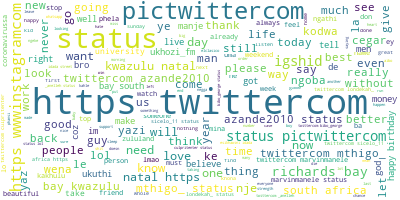

In [25]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


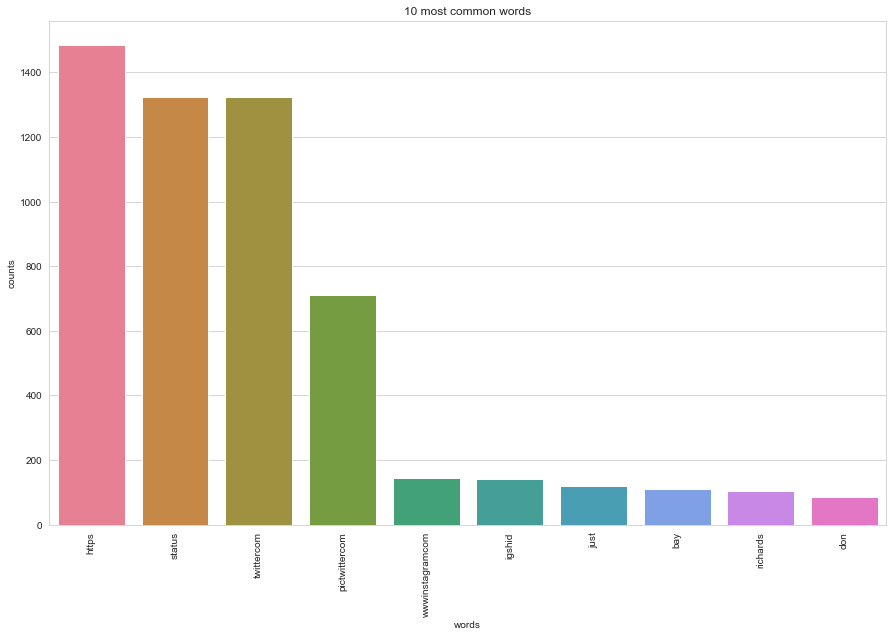

In [26]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['tweet'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [28]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics found via LDA:

Topic #0:
https status twittercom pictwittercom azande2010 like ke cegar don need

Topic #1:
https twittercom status pictwittercom don time know manje nje work

Topic #2:
wwwinstagramcom igshid pictwittercom bay richards https natal kwazulu just south

Topic #3:
pictwittercom just https don say best way ba ay did

Topic #4:
pictwittercom love happy life yes bro whatsapp africa la follow


In [37]:
#FIGURE OUT WHY THIS IS NOT WOKRING
#%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'w') as f:
    pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

TypeError: write() argument must be str, not bytes

In [38]:
#https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24